# Import Libraries

In [1]:
import gc
import time

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

dataset_name = "cicids18"

# Data

## Import Preparation

In [2]:
path = 'datasets/cicids18/raw/'

filenames = [
    'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',
    'Friday-16-02-2018_TrafficForML_CICFlowMeter.csv',
    'Friday-23-02-2018_TrafficForML_CICFlowMeter.csv',
    'Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv',
    'Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv',
    'Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv',
    'Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv',
    'Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv',
    'Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv',
    'Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv'
]

path = 'datasets/Datasets_original/CICIDS18/'

all_files = os.listdir(path)

csv_files = [
    f for f in all_files
    if os.path.isfile(os.path.join(path, f)) and f.lower().endswith('.csv')
]
for f in csv_files:
    print(f)



Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv
Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv


## Import and Analysis of Raw Data

In [4]:
rows_count = {}
for file in filenames:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path, low_memory=False)
    rows_count[file] = len(df)
    print(f"{file}: Shape: {df.shape}")

Friday-02-03-2018_TrafficForML_CICFlowMeter.csv: Shape: (1048575, 80)
Friday-16-02-2018_TrafficForML_CICFlowMeter.csv: Shape: (1048575, 80)
Friday-23-02-2018_TrafficForML_CICFlowMeter.csv: Shape: (1048575, 80)
Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv: Shape: (7948748, 84)
Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv: Shape: (331125, 80)
Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv: Shape: (1048575, 80)
Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv: Shape: (1048575, 80)
Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv: Shape: (1048575, 80)
Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv: Shape: (1048575, 80)
Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv: Shape: (613104, 80)


In [5]:
for file in filenames:
    df = pd.read_csv(path + file, low_memory=False)
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  float64
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [6]:
# Check extended columns

df1 = pd.read_csv(path + filenames[3], low_memory=False)
df2 = pd.read_csv(path + filenames[2], low_memory=False)

print("Columns in df1 but not in df2:")
for col in df1.columns:
    if col not in df2.columns:
        print(col)

Columns in df1 but not in df2:
Flow ID
Src IP
Src Port
Dst IP


## Check for NaN and Infinity

In [7]:
for file in filenames:
    try:
        df = pd.read_csv(path + file, low_memory=False)
        print(f"Loaded {file} with shape: {df.shape}\n")

        # Check for NaN values
        mask_nan = df.isna()
        for col in df.columns[mask_nan.any()]:
            indices = df.index[mask_nan[col]].tolist()
            print(f"Found {len(indices)} NaN values in column {col} at indices {indices[:10]}")

        # Check for positive infinity
        mask_pos_inf = df == np.inf
        for col in df.columns[mask_pos_inf.any()]:
            indices = df.index[mask_pos_inf[col]].tolist()
            print(f"Found {len(indices)} Infinity value in column {col} at indices {indices[:10]}")

        # Check for negative infinity
        mask_neg_inf = df == -np.inf
        for col in df.columns[mask_neg_inf.any()]:
            indices = df.index[mask_neg_inf[col]].tolist()
            print(f"Found {len(indices)} -Infinity value in column {col} at indices {indices[:10]}")

        print('__________________________________')

    except Exception as file_err:
        print(f"Error processing file '{file}': {file_err}")


Loaded Friday-02-03-2018_TrafficForML_CICFlowMeter.csv with shape: (1048575, 80)

Found 2558 NaN values in column Flow Byts/s at indices [108, 111, 119, 194, 204, 205, 365, 395, 451, 563]
Found 1492 Infinity value in column Flow Byts/s at indices [148, 236, 507, 757, 939, 951, 986, 1013, 1014, 1020]
Found 4050 Infinity value in column Flow Pkts/s at indices [108, 111, 119, 148, 194, 204, 205, 236, 365, 395]
__________________________________
Loaded Friday-16-02-2018_TrafficForML_CICFlowMeter.csv with shape: (1048575, 80)

__________________________________
Loaded Friday-23-02-2018_TrafficForML_CICFlowMeter.csv with shape: (1048575, 80)

Found 3754 NaN values in column Flow Byts/s at indices [2969, 3265, 3269, 3275, 3305, 3646, 3728, 4149, 4201, 4332]
Found 1954 Infinity value in column Flow Byts/s at indices [3030, 3528, 3844, 4089, 4199, 5188, 5432, 5507, 5676, 5907]
Found 5708 Infinity value in column Flow Pkts/s at indices [2969, 3030, 3265, 3269, 3275, 3305, 3528, 3646, 3728, 3844]

# Pre-Processing

## Handle NaN and Infinity

In [8]:
# handle corrupted values, find max and mean values within all files
# mean for nan
# 2*max value of column for infinity

frames = []
for file in filenames:
    print(file)
    df = pd.read_csv(path + file, usecols=['Flow Byts/s', 'Flow Pkts/s'], low_memory=False)
    frames.append(df)

df_fix = pd.concat(frames, ignore_index=True)
print(df_fix.info())

df_fix.to_csv('datasets/cicids18/corrupted_columns.csv')

Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16233002 entries, 0 to 16233001
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Flow Byts/s  object
 1   Flow Pkts/s  object
dtypes: object(2)
memory usage: 247.7+ MB
None


In [9]:
df_fix = pd.read_csv('datasets/cicids18/corrupted_columns.csv', index_col=0, low_memory=False)

In [10]:
df_fix.head()

,Flow Byts/s,Flow Pkts/s
0,30597.30523,113.1661775
1,135231.3167,10676.15658
2,41501.0864,92.91554692
3,0.0,15151.51515
4,27100.60726,80.28728249


In [11]:
# calculate mean and max for both columns

df_fix['Flow Byts/s'] = pd.to_numeric(df_fix['Flow Byts/s'], errors='coerce')
df_fix['Flow Pkts/s'] = pd.to_numeric(df_fix['Flow Pkts/s'], errors='coerce')

# Replace infinity values with NaN
df_fix.replace([np.inf, -np.inf], np.nan, inplace=True)

# Compute mean and max, ignoring NaN
mean_flow_byts = df_fix['Flow Byts/s'].mean()
max_flow_byts = df_fix['Flow Byts/s'].max()
mean_flow_pkts = df_fix['Flow Pkts/s'].mean()
max_flow_pkts = df_fix['Flow Pkts/s'].max()

print(f"Flow Byts/s - Mean: {mean_flow_byts}, Max: {max_flow_byts}")
print(f"Flow Pkts/s - Mean: {mean_flow_pkts}, Max: {max_flow_pkts}")

# use these values to replace either NaN or infinity in dataset

Flow Byts/s - Mean: 257034.8932576147, Max: 1806642857.14286
Flow Pkts/s - Mean: 52296.98215171978, Max: 6000000.0


## Clean and Downcast dataframes

In [12]:
# Dict to downcast values

dtypes = {
    "Dst Port": "int32",
    "Protocol": "int32",
    #"Timestamp": "object",
    "Flow Duration": "int32",
    "Tot Fwd Pkts": "int32",
    "Tot Bwd Pkts": "int32",
    "TotLen Fwd Pkts": "int32",
    "TotLen Bwd Pkts": "float32",
    "Fwd Pkt Len Max": "int32",
    "Fwd Pkt Len Min": "int32",
    "Fwd Pkt Len Mean": "float32",
    "Fwd Pkt Len Std": "float32",
    "Bwd Pkt Len Max": "int32",
    "Bwd Pkt Len Min": "int32",
    "Bwd Pkt Len Mean": "float32",
    "Bwd Pkt Len Std": "float32",
    "Flow Byts/s": "float64", # infinity values....
    "Flow Pkts/s": "float32",
    "Flow IAT Mean": "float32",
    "Flow IAT Std": "float32",
    "Flow IAT Max": "float32",
    "Flow IAT Min": "float32",
    "Fwd IAT Tot": "float32",
    "Fwd IAT Mean": "float32",
    "Fwd IAT Std": "float32",
    "Fwd IAT Max": "float32",
    "Fwd IAT Min": "float32",
    "Bwd IAT Tot": "float32",
    "Bwd IAT Mean": "float32",
    "Bwd IAT Std": "float32",
    "Bwd IAT Max": "float32",
    "Bwd IAT Min": "float32",
    "Fwd PSH Flags": "int32",
    "Bwd PSH Flags": "int32",
    "Fwd URG Flags": "int32",
    "Bwd URG Flags": "int32",
    "Fwd Header Len": "int32",
    "Bwd Header Len": "int32",
    "Fwd Pkts/s": "float32",
    "Bwd Pkts/s": "float32",
    "Pkt Len Min": "int32",
    "Pkt Len Max": "int32",
    "Pkt Len Mean": "float32",
    "Pkt Len Std": "float32",
    "Pkt Len Var": "float32",
    "FIN Flag Cnt": "int32",
    "SYN Flag Cnt": "int32",
    "RST Flag Cnt": "int32",
    "PSH Flag Cnt": "int32",
    "ACK Flag Cnt": "int32",
    "URG Flag Cnt": "int32",
    "CWE Flag Count": "int32",
    "ECE Flag Cnt": "int32",
    "Down/Up Ratio": "int32",
    "Pkt Size Avg": "float32",
    "Fwd Seg Size Avg": "float32",
    "Bwd Seg Size Avg": "float32",
    "Fwd Byts/b Avg": "int32",
    "Fwd Pkts/b Avg": "int32",
    "Fwd Blk Rate Avg": "int32",
    "Bwd Byts/b Avg": "int32",
    "Bwd Pkts/b Avg": "int32",
    "Bwd Blk Rate Avg": "int32",
    "Subflow Fwd Pkts": "int32",
    "Subflow Fwd Byts": "int32",
    "Subflow Bwd Pkts": "int32",
    "Subflow Bwd Byts": "int32",
    "Init Fwd Win Byts": "int32",
    "Init Bwd Win Byts": "int32",
    "Fwd Act Data Pkts": "int32",
    "Fwd Seg Size Min": "int32",
    "Active Mean": "float32",
    "Active Std": "float32",
    "Active Max": "float32",
    "Active Min": "float32",
    "Idle Mean": "float32",
    "Idle Std": "float32",
    "Idle Max": "float32",
    "Idle Min": "float32",
    "Label": "string"
}


In [13]:
# Remove Problematic Values and Save to Parquet
import gc
import time

fbmean = 257034.8932576147
fbmax = 2 * 1806642857.14286
fpmean = 52296.98215171978
fpmax = 2 * 6000000.0

for file in filenames:
    try:

        df = pd.read_csv(path + file, low_memory=False)
        original_shape = df.shape
        print(f"Loaded {file} with shape: {original_shape}")
        #print(df.columns)

        # remove invalid columns
        invalid = ["Timestamp", "Flow ID", "Src IP", "Src Port", "Dst IP"]
        for _ in invalid:
            if _ in df.columns:
                df.drop(_, axis=1, inplace=True)
                print(f"Column '{_}' removed")

        # remove repeated header rows
        repeated_header_rows = []
        for col in df.columns:
            mask = df[col] == col
            repeated_header_rows.extend(df.index[mask].tolist())
            df = df[~mask]
        repeated_header_rows = sorted(set(repeated_header_rows))
        print(f"Removed {len(repeated_header_rows)} repeated header rows at indices: {repeated_header_rows}")

        # Convert relevant columns to numeric
        for col in ['Flow Byts/s', 'Flow Pkts/s']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')

        # replace NaN and infinity values
        if 'Flow Byts/s' in df.columns:
            df['Flow Byts/s'] = df['Flow Byts/s'].replace(np.nan, fbmean)
            df['Flow Byts/s'] = df['Flow Byts/s'].replace(np.inf, fbmax)
        if 'Flow Pkts/s' in df.columns:
            df['Flow Pkts/s'] = df['Flow Pkts/s'].replace(np.nan, fpmean)
            df['Flow Pkts/s'] = df['Flow Pkts/s'].replace(np.inf, fpmax)

        # Report columns and rows with NaN values
        cols_with_nan = df.columns[df.isna().any()].tolist()
        rows_with_nan = df.index[df.isna().any(axis=1)].tolist()
        print(f"Columns with NaN values: {cols_with_nan}")
        print(f"Rows with NaN values: {rows_with_nan[:10]}{'...' if len(rows_with_nan) > 10 else ''} (total: {len(rows_with_nan)})")

        # Downcast datatypes for efficiency
        for column_name in df.columns:
            if column_name in dtypes:
                dtype = dtypes[column_name]
                try:
                    df[column_name] = df[column_name].astype(dtype)

                except Exception as col_err:
                    print(f"Warning: Could not convert column '{column_name}' to {dtype} in file '{file}': {col_err}")

        print(df.info())
        # save as Parquet
        parquet_path = path + file[:-4] + '.parquet'
        df.to_parquet(parquet_path)
        print(f"Saved cleaned file with shape {df.shape} as: {parquet_path}\n")

        # Clean up
        #del df
        gc.collect()
        time.sleep(5)

    except Exception as file_err:
        print(f"Error processing file '{file}': {file_err}")


Loaded Friday-02-03-2018_TrafficForML_CICFlowMeter.csv with shape: (1048575, 80)
Column 'Timestamp' removed
Removed 0 repeated header rows at indices: []
Columns with NaN values: []
Rows with NaN values: [] (total: 0)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int32  
 1   Protocol           1048575 non-null  int32  
 2   Flow Duration      1048575 non-null  int32  
 3   Tot Fwd Pkts       1048575 non-null  int32  
 4   Tot Bwd Pkts       1048575 non-null  int32  
 5   TotLen Fwd Pkts    1048575 non-null  int32  
 6   TotLen Bwd Pkts    1048575 non-null  float32
 7   Fwd Pkt Len Max    1048575 non-null  int32  
 8   Fwd Pkt Len Min    1048575 non-null  int32  
 9   Fwd Pkt Len Mean   1048575 non-null  float32
 10  Fwd Pkt Len Std    1048575 non-null  float32
 11  Bwd Pkt Len Ma

## Combining dataframes

In [14]:
filenames = [name.replace('.csv', '.parquet') for name in filenames]

In [15]:
# Read all Parquet files into a list of DataFrames
dfs = [pd.read_parquet(path + file) for file in filenames]

# Concatenate all DataFrames into a single DataFrame
df_concat = pd.concat(dfs, ignore_index=True)

df_concat.to_parquet(path + 'cicids18-concat.parquet')

In [16]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16232943 entries, 0 to 16232942
Data columns (total 79 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int32  
 1   Protocol           int32  
 2   Flow Duration      int32  
 3   Tot Fwd Pkts       int32  
 4   Tot Bwd Pkts       int32  
 5   TotLen Fwd Pkts    int32  
 6   TotLen Bwd Pkts    float32
 7   Fwd Pkt Len Max    int32  
 8   Fwd Pkt Len Min    int32  
 9   Fwd Pkt Len Mean   float32
 10  Fwd Pkt Len Std    float32
 11  Bwd Pkt Len Max    int32  
 12  Bwd Pkt Len Min    int32  
 13  Bwd Pkt Len Mean   float32
 14  Bwd Pkt Len Std    float32
 15  Flow Byts/s        float64
 16  Flow Pkts/s        float32
 17  Flow IAT Mean      float32
 18  Flow IAT Std       float32
 19  Flow IAT Max       float32
 20  Flow IAT Min       float32
 21  Fwd IAT Tot        float32
 22  Fwd IAT Mean       float32
 23  Fwd IAT Std        float32
 24  Fwd IAT Max        float32
 25  Fwd IAT Min     

## Pattern Analysis

In [3]:
df = pd.read_parquet('datasets/Datasets_original/CICIDS18/cicids18-concat.parquet')

In [4]:
df.shape

(16232943, 79)

In [5]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,141385,9,7,553,3773.0,202,0,61.444443,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,281,2,1,38,0.0,38,0,19.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,279824,11,15,1086,10527.0,385,0,98.727272,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,132,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,274016,9,13,1285,6141.0,517,0,142.777771,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


## Correlation Matrix - Before Cleaning

In [6]:
corr = df.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm',
                               axis = None).format(precision = 2)

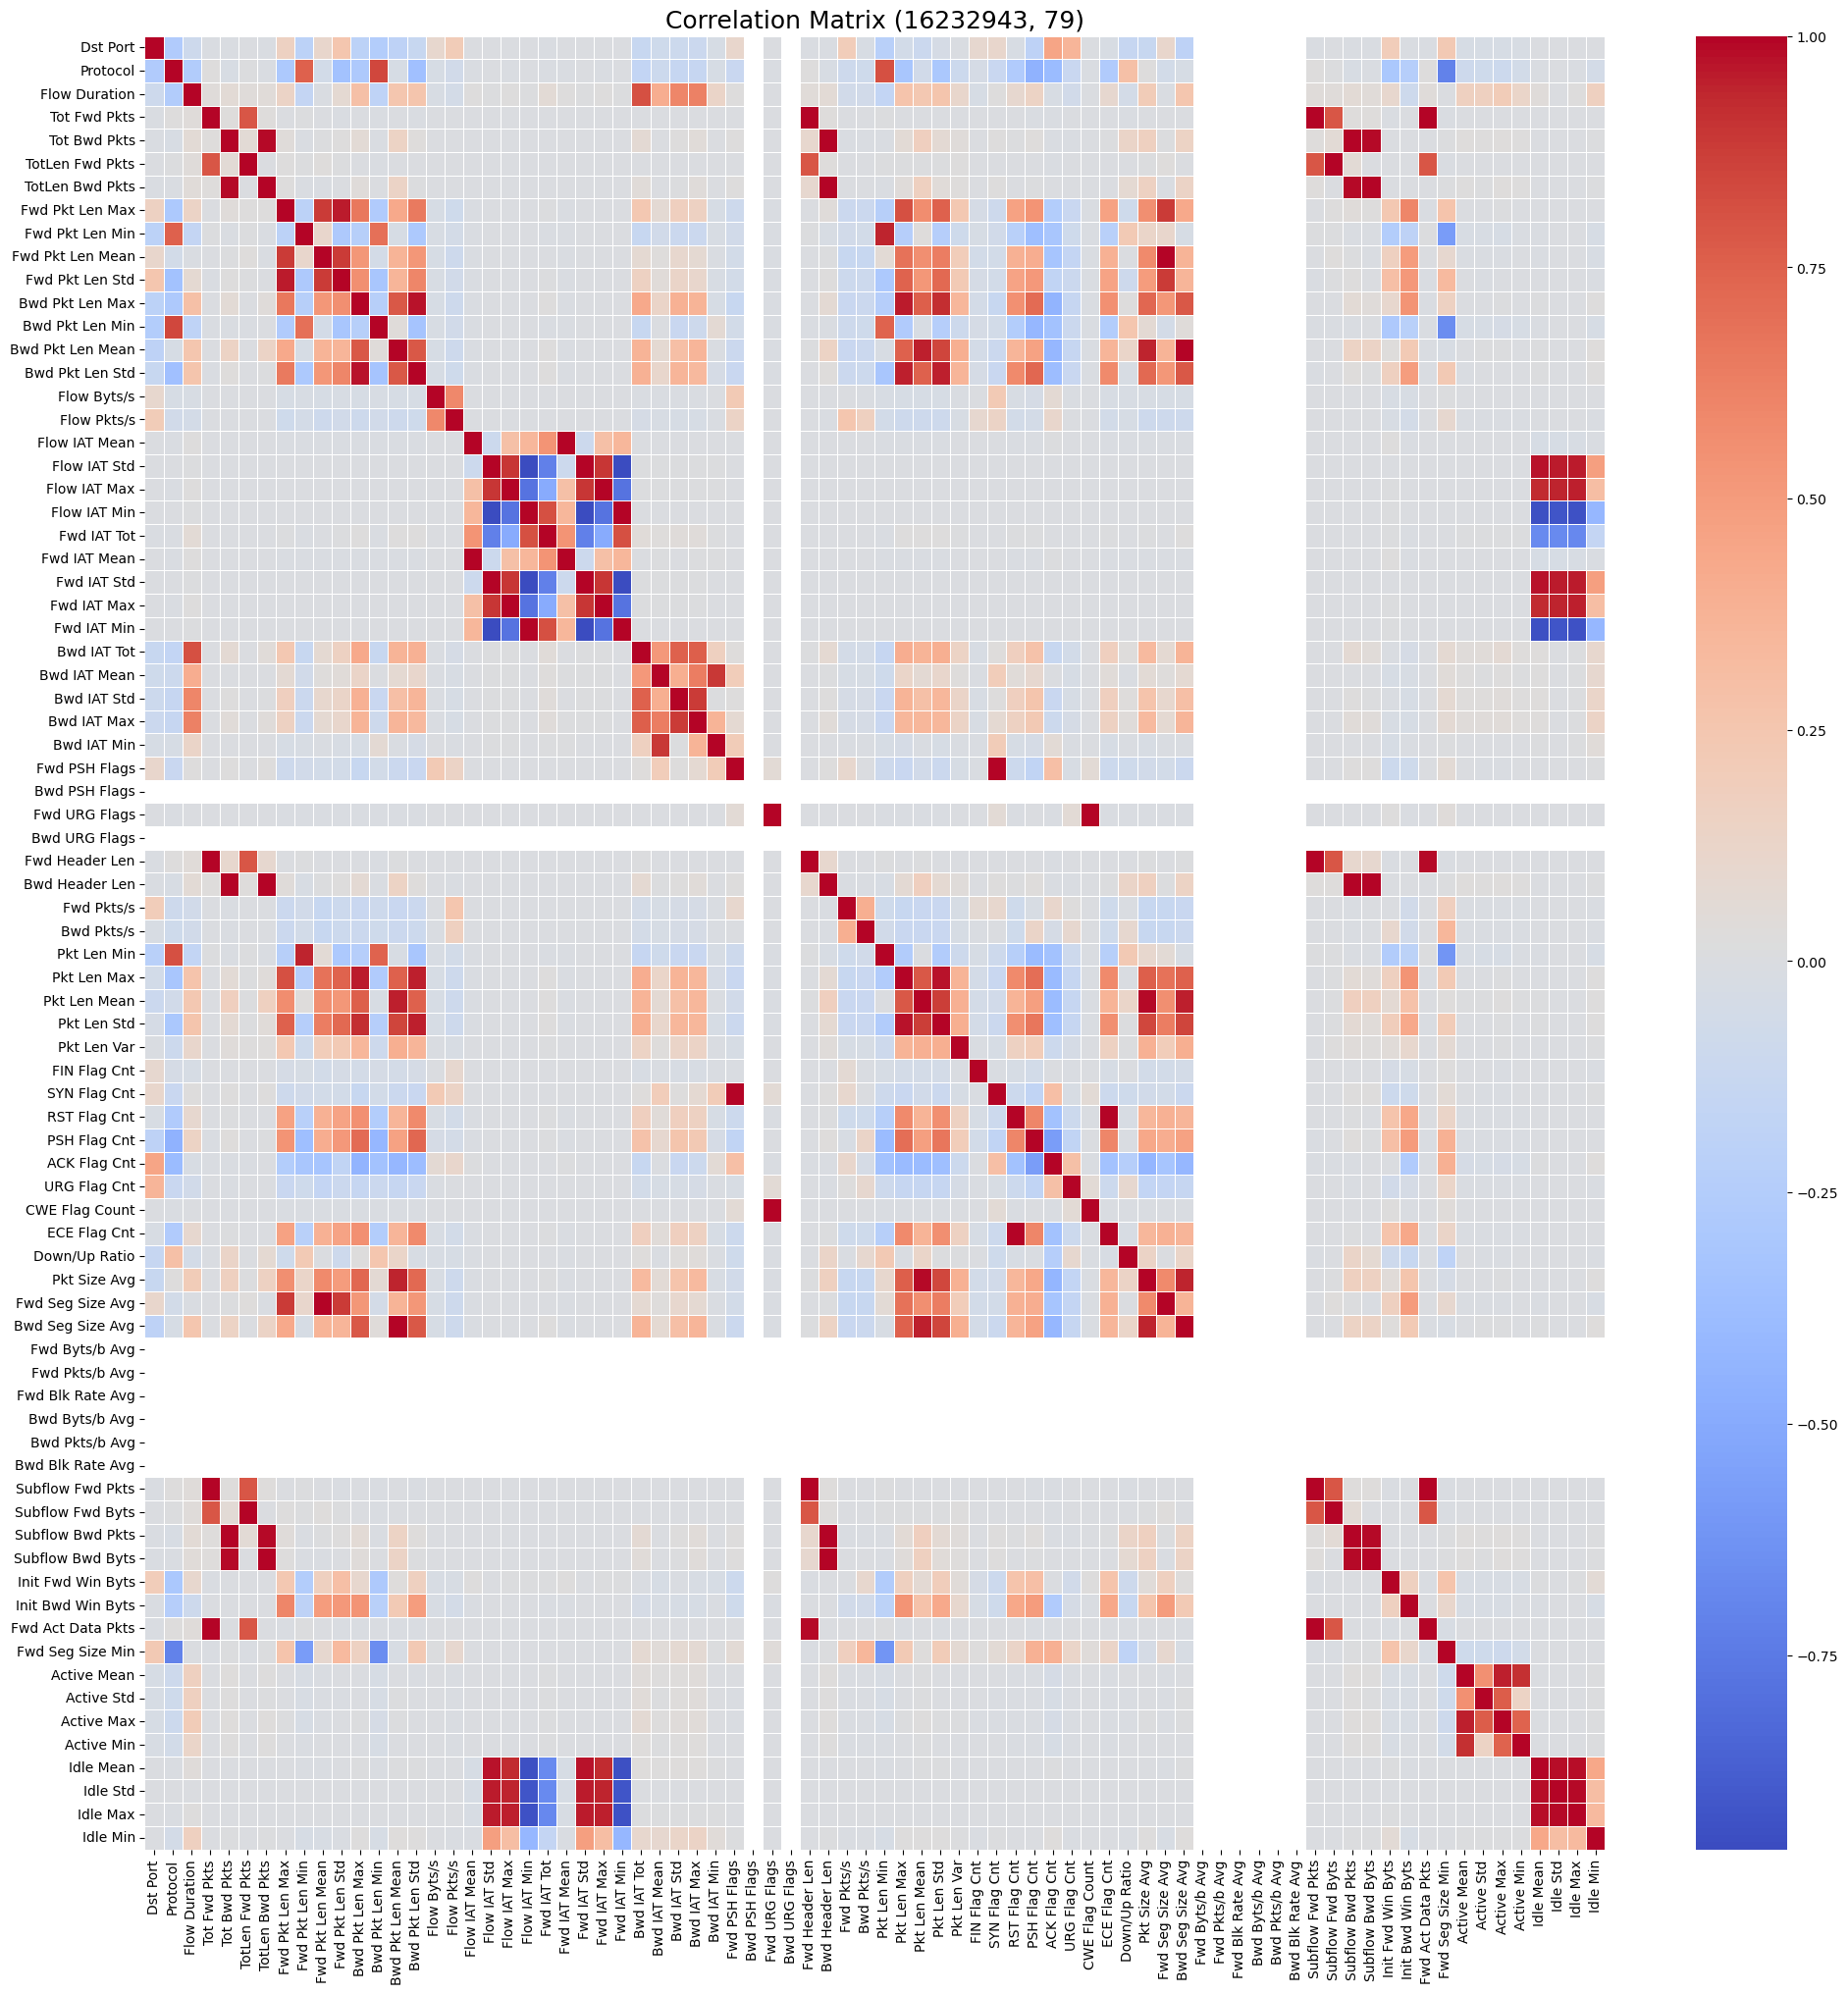

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title(f'Correlation Matrix {df.shape}', fontsize = 18)
filename = f"datasets/plots/{dataset_name}_correlation_matrix_before.png"
os.makedirs("datasets/plots", exist_ok=True)
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

In [8]:
print(df['Label'].value_counts())

Label
Benign                      13484708
DDOS attack-HOIC              686012
DDoS attacks-LOIC-HTTP        576191
DoS attacks-Hulk              461912
Bot                           286191
FTP-BruteForce                193360
SSH-Bruteforce                187589
Infilteration                 161934
DoS attacks-SlowHTTPTest      139890
DoS attacks-GoldenEye          41508
DoS attacks-Slowloris          10990
DDOS attack-LOIC-UDP            1730
Brute Force -Web                 611
Brute Force -XSS                 230
SQL Injection                     87
Name: count, dtype: Int64


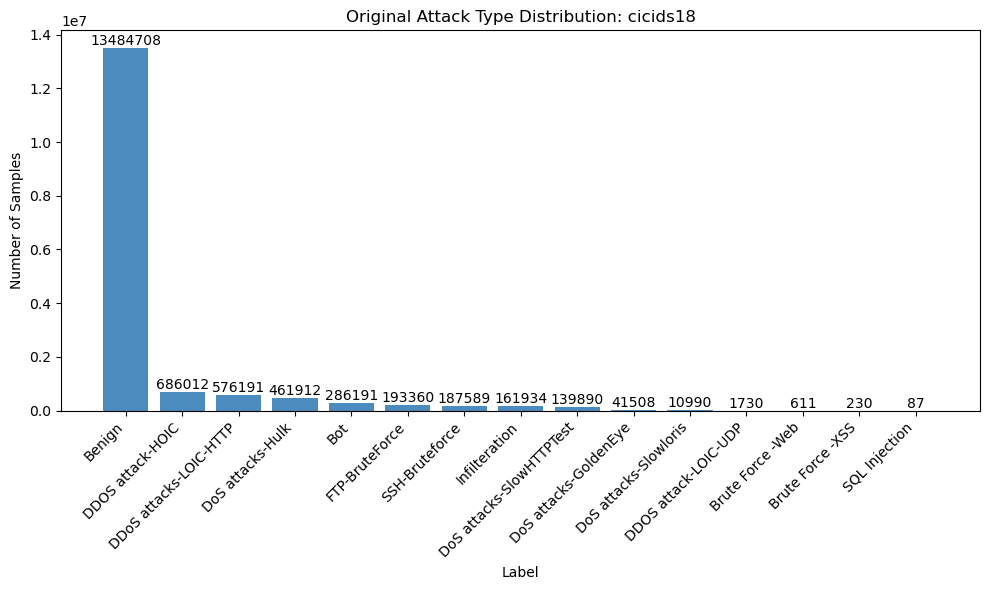

In [10]:
category_counts = df['Label'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values, color='#4B8BBE')
plt.title(f'Original Attack Type Distribution: {dataset_name}')
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center', va='bottom', fontsize=10
    )

plt.savefig(f'datasets/plots/{dataset_name}_attack_type_distribution.png', bbox_inches='tight')
plt.show()

In [11]:

#df = pd.read_csv(path + file, low_memory=False)
print(f"Loaded with shape: {df.shape}\n")

# Check for NaN values
mask_nan = df.isna()
for col in df.columns[mask_nan.any()]:
    indices = df.index[mask_nan[col]].tolist()
    print(f"Found {len(indices)} NaN values in column {col} at indices {indices[:10]}")

# Check for positive infinity
mask_pos_inf = df == np.inf
for col in df.columns[mask_pos_inf.any()]:
    indices = df.index[mask_pos_inf[col]].tolist()
    print(f"Found {len(indices)} Infinity value in column {col} at indices {indices[:10]}")

# Check for negative infinity
mask_neg_inf = df == -np.inf
for col in df.columns[mask_neg_inf.any()]:
    indices = df.index[mask_neg_inf[col]].tolist()
    print(f"Found {len(indices)} -Infinity value in column {col} at indices {indices[:10]}")




Loaded with shape: (16232943, 79)



## Relabeling

In [12]:
df_label_map = {
    'BENIGN': 'BENIGN',
    'DDOS attack-HOIC': 'DDoS',
    'DDoS attacks-LOIC-HTTP': 'DDoS',
    'DoS attacks-Hulk': 'DoS',
    'Bot': 'Bot',
    'FTP-BruteForce' : 'Brute Force',
    'SSH-Bruteforce' : 'Brute Force',
    'Infiltration': 'Infiltration',
    'DoS attacks-SlowHTTPTest' : 'DoS',
    'DoS attacks-GoldenEye' : 'DoS',
    'DoS attacks-Slowloris' : 'DoS',
    'DDOS attack-LOIC-UDP' : 'DDoS',
    'Brute Force -Web' : 'Brute Force',
    'Brute Force -XSS' : 'Brute Force',
    'SQL Injection' : 'SQL Injection',
}

df['Label'] = df['Label'].replace(df_label_map)
print(df['Label'].value_counts())

Label
Benign           13484708
DDoS              1263933
DoS                654300
Brute Force        381790
Bot                286191
Infilteration      161934
SQL Injection          87
Name: count, dtype: Int64


## Find Single Value Columns

In [13]:
# Count unique values in each column
unique_counts = df.nunique()

# Select columns with only one unique value
single_value_columns = unique_counts[unique_counts == 1].index.tolist()

print("Columns with only one unique value:", single_value_columns)

# Remove single value columns

Columns with only one unique value: ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']


In [14]:

# remove single value columns
sv_cols = ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
for _ in sv_cols:
    df.drop(_, axis=1, inplace=True)
    print(f"Column '{_}' removed")
print(df.info())

Column 'Bwd PSH Flags' removed
Column 'Bwd URG Flags' removed
Column 'Fwd Byts/b Avg' removed
Column 'Fwd Pkts/b Avg' removed
Column 'Fwd Blk Rate Avg' removed
Column 'Bwd Byts/b Avg' removed
Column 'Bwd Pkts/b Avg' removed
Column 'Bwd Blk Rate Avg' removed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16232943 entries, 0 to 16232942
Data columns (total 71 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int32  
 1   Protocol           int32  
 2   Flow Duration      int32  
 3   Tot Fwd Pkts       int32  
 4   Tot Bwd Pkts       int32  
 5   TotLen Fwd Pkts    int32  
 6   TotLen Bwd Pkts    float32
 7   Fwd Pkt Len Max    int32  
 8   Fwd Pkt Len Min    int32  
 9   Fwd Pkt Len Mean   float32
 10  Fwd Pkt Len Std    float32
 11  Bwd Pkt Len Max    int32  
 12  Bwd Pkt Len Min    int32  
 13  Bwd Pkt Len Mean   float32
 14  Bwd Pkt Len Std    float32
 15  Flow Byts/s        float64
 16  Flow Pkts/s        float32
 17  Flow IAT Mean 

## Find Identical Columns

In [15]:
identical_columns = []
cols = df.columns.tolist()
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if df[cols[i]].equals(df[cols[j]]):
            identical_columns.append((cols[i], cols[j]))

print("Identical column pairs:\n")
for _ in identical_columns:
    print(_)
    print(f"Removing: {_[1]}")
    df.drop(_[1], axis=1, inplace=True)

Identical column pairs:

('Tot Fwd Pkts', 'Subflow Fwd Pkts')
Removing: Subflow Fwd Pkts
('Tot Bwd Pkts', 'Subflow Bwd Pkts')
Removing: Subflow Bwd Pkts
('TotLen Fwd Pkts', 'Subflow Fwd Byts')
Removing: Subflow Fwd Byts
('Fwd Pkt Len Mean', 'Fwd Seg Size Avg')
Removing: Fwd Seg Size Avg
('Bwd Pkt Len Mean', 'Bwd Seg Size Avg')
Removing: Bwd Seg Size Avg
('Fwd PSH Flags', 'SYN Flag Cnt')
Removing: SYN Flag Cnt
('Fwd URG Flags', 'CWE Flag Count')
Removing: CWE Flag Count


In [16]:
identical_columns = []
cols = df.columns.tolist()
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if df[cols[i]].equals(df[cols[j]]):
            identical_columns.append((cols[i], cols[j]))
print("Identical column pairs:\n", identical_columns)

Identical column pairs:
 []


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16232943 entries, 0 to 16232942
Data columns (total 64 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int32  
 1   Protocol           int32  
 2   Flow Duration      int32  
 3   Tot Fwd Pkts       int32  
 4   Tot Bwd Pkts       int32  
 5   TotLen Fwd Pkts    int32  
 6   TotLen Bwd Pkts    float32
 7   Fwd Pkt Len Max    int32  
 8   Fwd Pkt Len Min    int32  
 9   Fwd Pkt Len Mean   float32
 10  Fwd Pkt Len Std    float32
 11  Bwd Pkt Len Max    int32  
 12  Bwd Pkt Len Min    int32  
 13  Bwd Pkt Len Mean   float32
 14  Bwd Pkt Len Std    float32
 15  Flow Byts/s        float64
 16  Flow Pkts/s        float32
 17  Flow IAT Mean      float32
 18  Flow IAT Std       float32
 19  Flow IAT Max       float32
 20  Flow IAT Min       float32
 21  Fwd IAT Tot        float32
 22  Fwd IAT Mean       float32
 23  Fwd IAT Std        float32
 24  Fwd IAT Max        float32
 25  Fwd IAT Min     

# Correlation Matrix - After Processing

In [18]:
corr = df.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm',
                               axis = None).format(precision = 2)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Dst Port,1.00,-0.27,-0.09,-0.01,-0.01,-0.00,-0.01,0.16,-0.20,0.11,0.25,-0.20,-0.25,-0.19,-0.13,0.10,0.21,0.00,-0.00,-0.00,0.00,-0.01,0.00,-0.00,-0.00,0.00,-0.13,-0.08,-0.10,-0.11,-0.03,0.11,0.00,-0.01,-0.01,0.20,-0.02,-0.22,-0.06,-0.11,-0.04,-0.01,0.09,-0.02,-0.19,0.45,0.36,-0.02,-0.14,-0.13,-0.01,0.20,-0.01,-0.01,0.23,-0.03,-0.03,-0.03,-0.02,0.00,-0.00,-0.00,0.00
Protocol,-0.27,1.00,-0.26,0.02,-0.02,0.01,-0.01,-0.29,0.75,-0.06,-0.34,-0.28,0.84,-0.03,-0.36,-0.03,-0.07,-0.01,-0.00,-0.01,-0.00,-0.01,-0.01,-0.00,-0.01,-0.00,-0.16,-0.10,-0.14,-0.14,-0.03,-0.12,-0.01,0.02,-0.02,-0.09,-0.08,0.81,-0.31,-0.07,-0.30,-0.10,-0.04,-0.27,-0.45,-0.39,-0.12,-0.27,0.29,0.02,-0.01,-0.30,-0.24,0.02,-0.71,-0.09,-0.08,-0.10,-0.06,-0.01,-0.00,-0.01,-0.05
Flow Duration,-0.09,-0.26,1.00,0.04,0.06,0.04,0.05,0.14,-0.15,-0.01,0.08,0.29,-0.18,0.25,0.26,-0.02,-0.05,0.02,0.01,0.02,0.01,0.06,0.02,0.01,0.02,0.01,0.81,0.41,0.60,0.62,0.13,0.02,-0.00,0.05,0.06,-0.07,-0.07,-0.16,0.27,0.24,0.26,0.11,-0.03,0.09,0.15,-0.02,-0.07,0.09,-0.05,0.21,0.05,0.10,-0.09,0.04,0.00,0.17,0.17,0.21,0.12,0.04,0.00,0.02,0.17
Tot Fwd Pkts,-0.01,0.02,0.04,1.00,0.03,0.79,0.03,-0.00,0.01,-0.00,-0.01,-0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.03,-0.00,-0.00,0.01,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,-0.00,-0.01,0.00,0.03,-0.01,-0.00,1.00,-0.01,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
Tot Bwd Pkts,-0.01,-0.02,0.06,0.03,1.00,0.06,0.99,0.04,-0.01,0.01,0.02,0.06,-0.01,0.15,0.03,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.07,0.00,0.02,0.05,-0.00,0.02,-0.00,0.10,1.00,-0.01,-0.01,-0.01,0.06,0.18,0.07,0.04,-0.00,0.01,0.03,-0.01,-0.01,0.01,0.13,0.17,0.99,0.00,0.00,0.00,0.01,0.03,0.02,0.03,0.02,0.00,0.00,0.00,0.01
TotLen Fwd Pkts,-0.00,0.01,0.04,0.79,0.06,1.00,0.00,0.02,0.01,0.03,0.01,0.00,-0.01,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.79,0.03,-0.00,-0.00,0.01,0.01,0.01,0.01,0.02,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.01,0.00,-0.00,0.00,0.79,-0.01,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
TotLen Bwd Pkts,-0.01,-0.01,0.05,0.03,0.99,0.00,1.00,0.02,-0.01,-0.01,0.00,0.04,-0.00,0.14,0.01,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.05,-0.00,0.01,0.04,-0.00,0.02,-0.00,0.09,1.00,-0.00,-0.00,-0.01,0.04,0.17,0.05,0.03,-0.00,0.00,0.01,-0.00,-0.00,0.00,0.08,0.16,1.00,0.00,-0.00,0.00,0.01,0.02,0.01,0.03,0.02,0.00,0.00,0.00,0.01
Fwd Pkt Len Max,0.16,-0.29,0.14,-0.00,0.04,0.02,0.02,1.00,-0.20,0.88,0.96,0.66,-0.27,0.43,0.65,-0.03,-0.08,-0.01,0.00,-0.00,-0.00,0.01,-0.01,0.00,-0.00,-0.00,0.24,0.07,0.18,0.16,-0.03,-0.09,-0.01,0.00,0.04,-0.11,-0.11,-0.23,0.81,0.57,0.75,0.24,-0.04,0.47,0.54,-0.25,-0.12,0.47,-0.08,0.56,0.02,0.24,0.60,-0.01,0.27,-0.00,-0.00,0.01,0.00,-0.00,-0.00,-0.00,-0.00
Fwd Pkt Len Min,-0.20,0.75,-0.15,0.01,-0.01,0.01,-0.01,-0.20,1.00,0.11,-0.28,-0.23,0.69,-0.03,-0.29,-0.02,-0.05,-0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.13,-0.07,-0.11,-0.11,-0.02,-0.07,-0.01,0.01,-0.02,-0.07,-0.06,0.94,-0.24,0.03,-0.24,-0.08,-0.03,-0.22,-0.37,-0.31,-0.08,

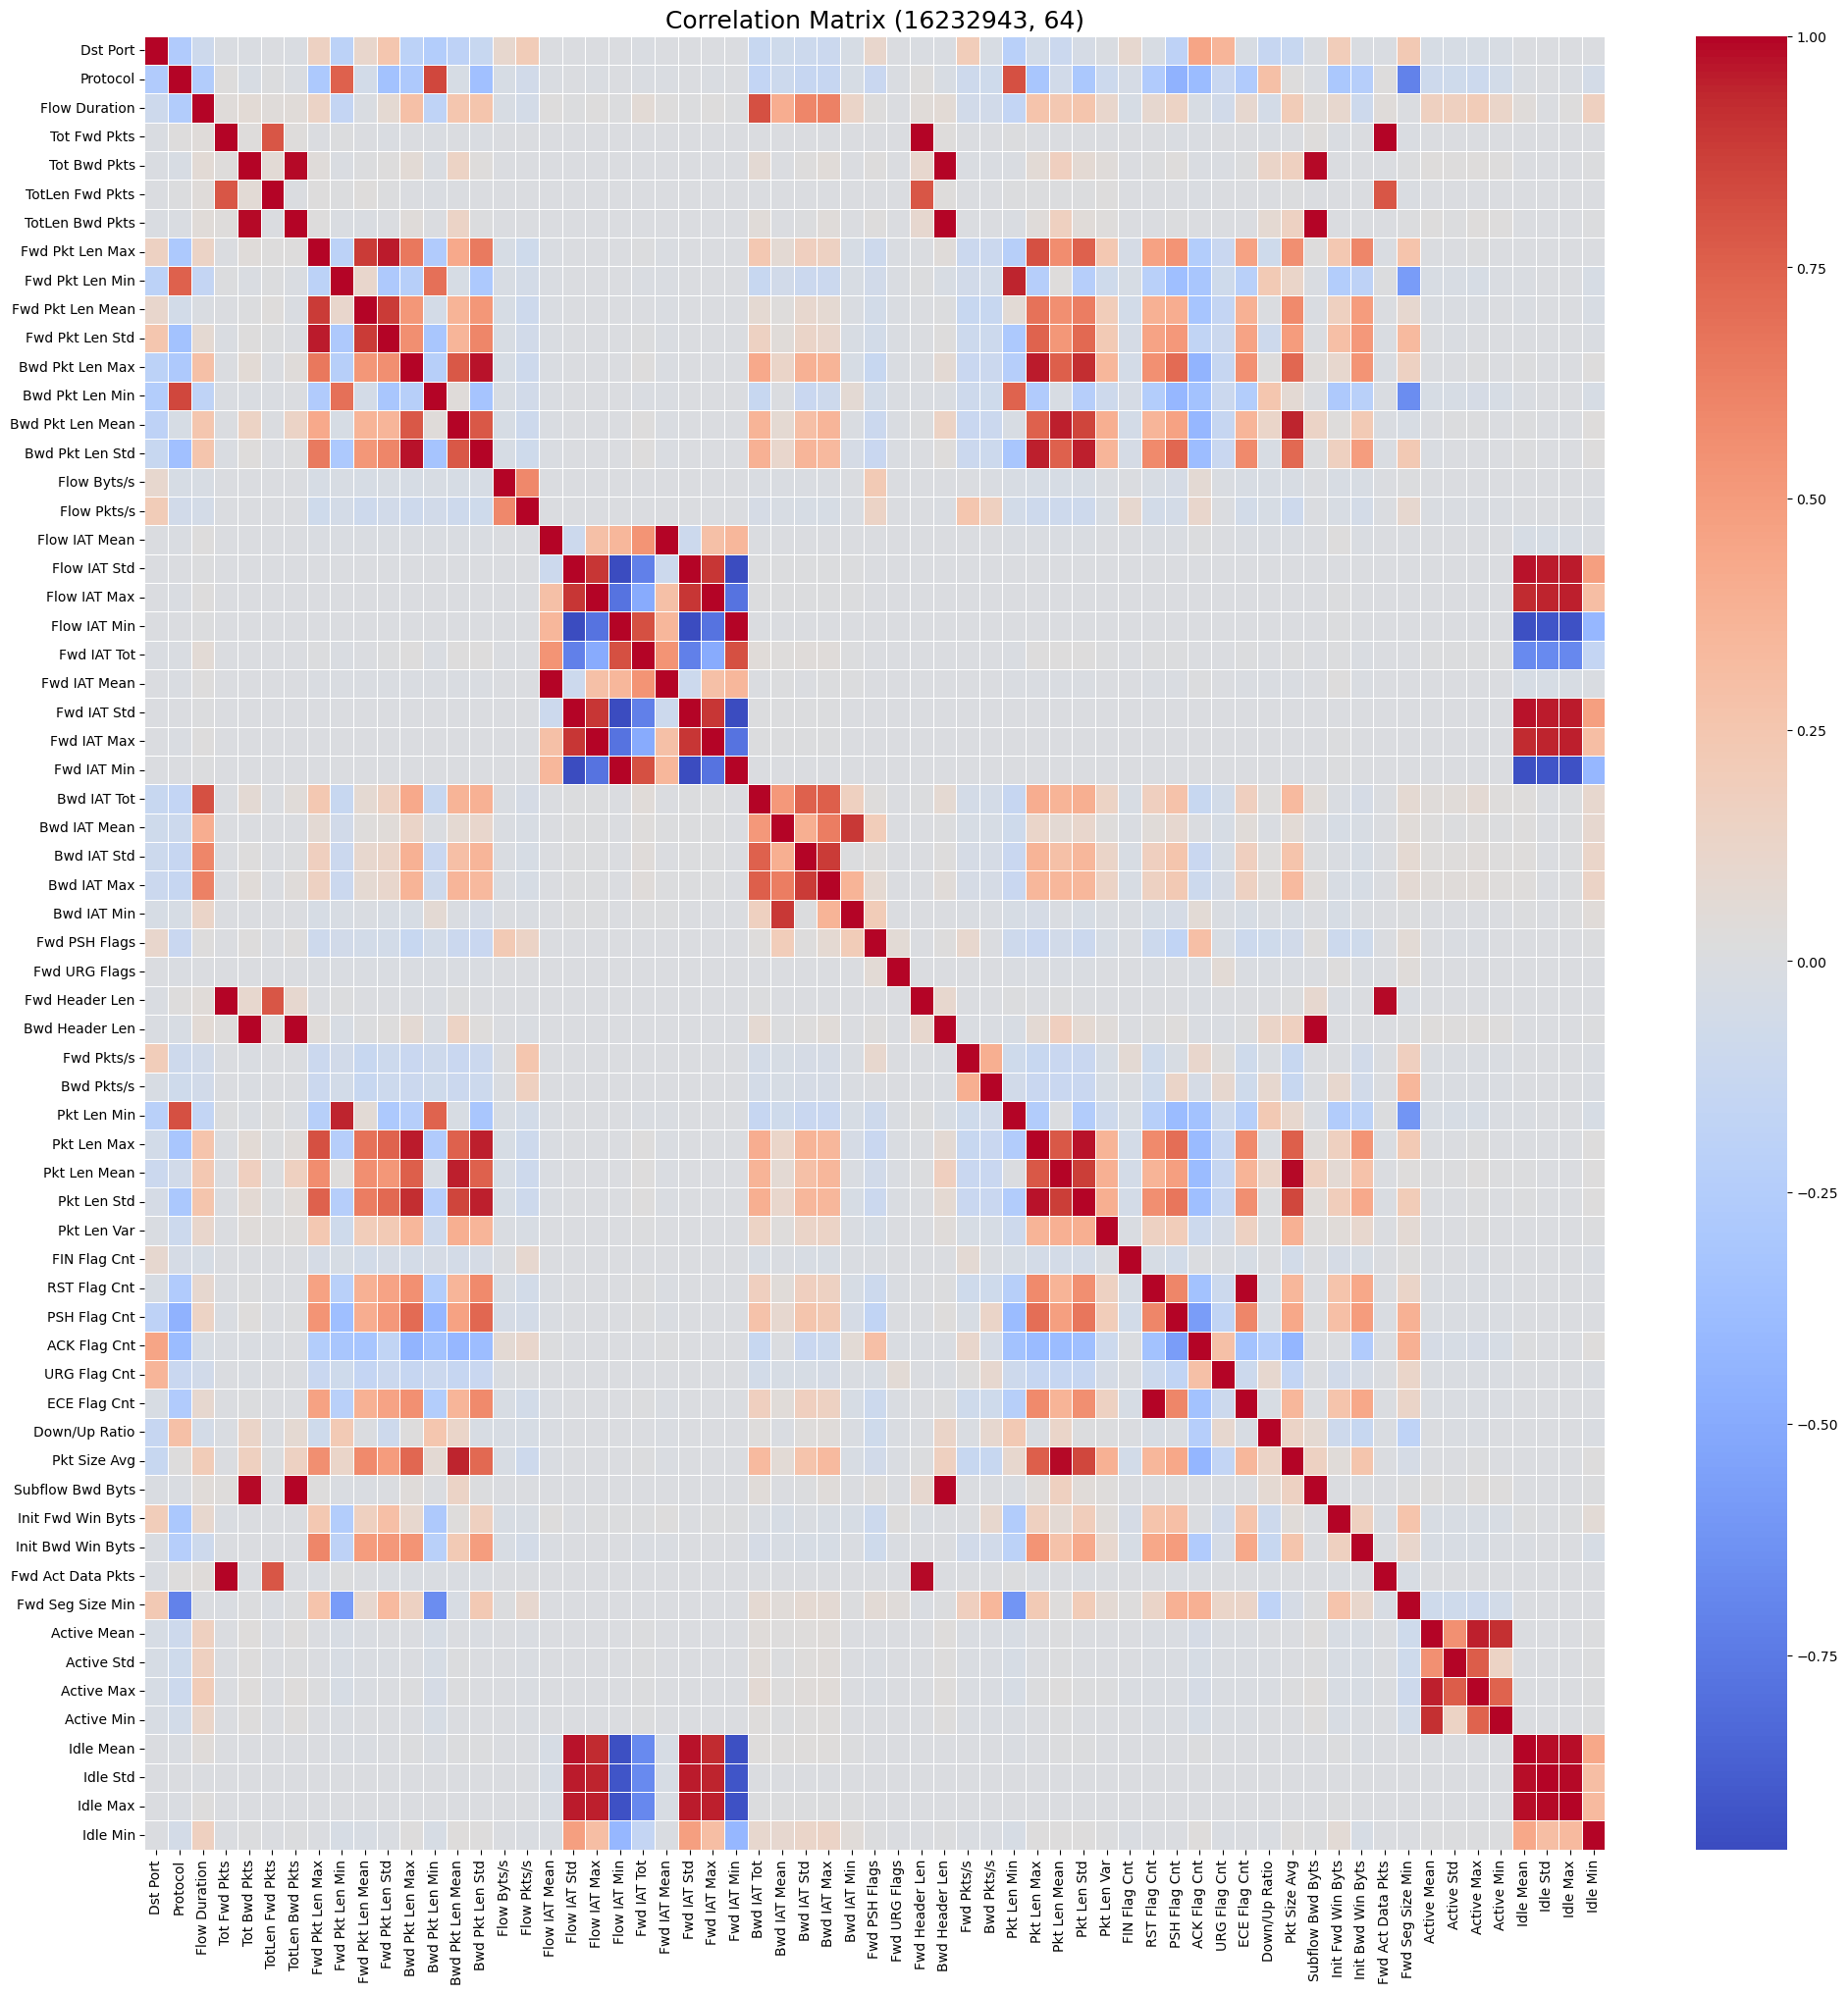

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title(f'Correlation Matrix {df.shape}', fontsize = 18)
filename = f"datasets/plots/{dataset_name}_correlation_matrix_after.png"
os.makedirs("datasets/plots", exist_ok=True)
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()


# Save Final DF

In [15]:
df.to_parquet('datasets/cicids18/cicids18-pre-processed.parquet')